<a href="https://colab.research.google.com/github/cutemfc/Automating-Classification-Flowers-/blob/main/Automating_Flower_Classification_for_a_Start_up_using_Deep_Learning_fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Information Technology. Automating Flower Classification for a Start-up Using Deep Learning

##Goal: The goal is to build a machine learning model capable of classifying images of flowers into their respective species.

##Dataset:
102 flower categories with diverse species.

40 to 258 images per category, leading to class imbalance challenges.

Training and test splits for model evaluation.

Images with varying sizes, lighting conditions, and backgrounds, making classification more challenging.

note: redefine the training, and test, we use test_datest as training_set because the number is 6000 better than ~1000

## Model Aracitecture:
Base model: ResNet50 (pretrained on ImageNet, top layers excluded)

• 	Dual-output heads:

• 	Coarse classification: 10 clusters

• 	Fine classification: 102 classes

• 	Hierarchical setup allows shared feature learning while optimizing both coarse and fine predictions

## Performance Comparison:
Hierarchical Model
training: coarse accuracy 52.28%, fine accuracy 36.06%
validation: coarse accuracy 33.33%, fine accuracy 11.96%

Original Model(Flat)
training: coarse accuracy - fine accuracy 0.85%
validation: coarse accuracy - fine accuracy 0.98%

#Key Insights:

- ✅ Fine accuracy improved ~10x with hierarchical classification
- ✅ Coarse classification provides meaningful structure that supports fine-grained learning
- 📉 Original model struggled to generalize, likely due to class imbalance or insufficient feature separation
- 🧩 Hierarchical setup encourages better feature reuse and semantic grouping
.


In [ ]:
# load the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf





# Step 1:  Dataset Acessess and Loading

In [ ]:
dataset, dataset_info= tfds.load('oxford_flowers102',
                 with_info=True,
                 as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.I12CIZ_2.1.1/oxford_flowers102-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.I12CIZ_2.1.1/oxford_flowers102-test.tfrecord*…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.I12CIZ_2.1.1/oxford_flowers102-validation.tfr…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


In [ ]:
print(dataset_info)

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102

In [ ]:
test_set=dataset['test']
training_set=dataset['train']
validation_set=dataset['validation']

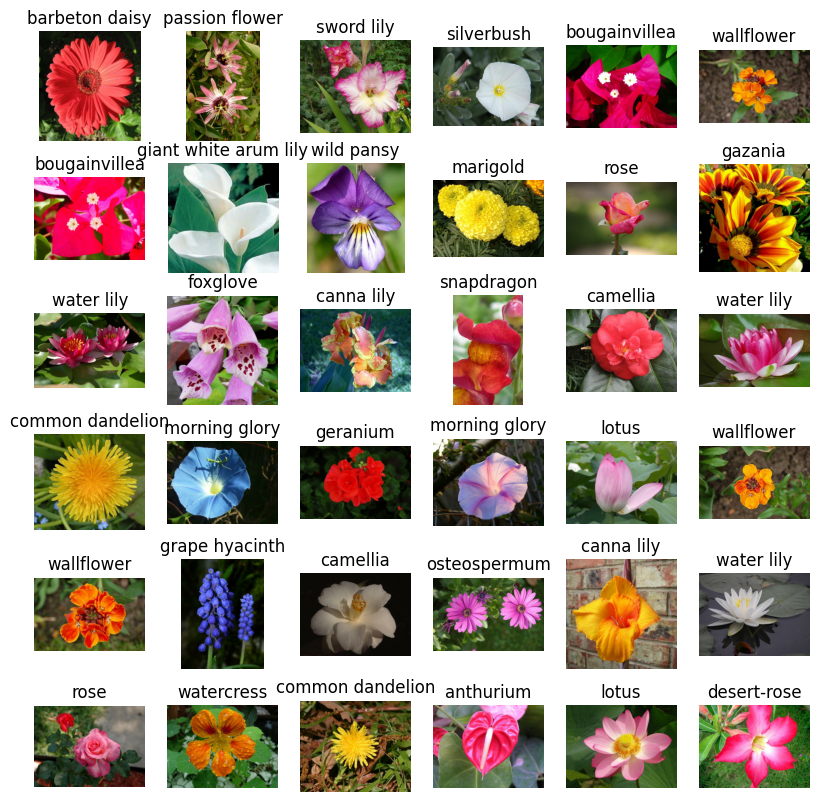

In [ ]:
# Show the image
plt.figure(figsize=(10, 10))
for i, (images, labels) in enumerate(training_set.take(36)):
    ax=plt.subplot(6, 6, i+1)
    plt.imshow(images)
    plt.title(dataset_info.features['label'].int2str(labels.numpy())) # transform the nump to string
    plt.axis('off')

In [ ]:
# Check the numbers of the each train, test, and validate dataset
print(len(training_set))
print(len(validation_set))
print(len(test_set))

1020
1020
6149


##note: Separate to 102 categories, the training set each category only train 10 pictures, the testset has high ratio of


In [ ]:
# List the flower categories
print(dataset_info.features['label'].names)


['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil', 'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup', 'oxeye daisy', 'common dandelion', 'petunia', 'wild pansy', 'primula', 'sunflower', 'pelargonium', 'bishop of llandaff', 'gaura', 'geranium', 'orange dahlia', 'pink-yellow dahlia?', 'ca

In [ ]:
# print dataset info
print(dataset_info.description)

The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
occurring in the United Kingdom. Each class consists of between 40 and 258
images. The images have large scale, pose and light variations. In addition,
there are categories that have large variations within the category and several
very similar categories.

The dataset is divided into a training set, a validation set and a test set. The
training set and validation set each consist of 10 images per class (totalling
1020 images each). The test set consists of the remaining 6149 images (minimum
20 per class).

Note: The dataset by default comes with a test size larger than the train size.
For more info see this
[issue](https://github.com/tensorflow/datasets/issues/3022).


In [ ]:
# print dataset_info feature
print(dataset_info.features)

FeaturesDict({
    'file_name': Text(shape=(), dtype=string),
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=102),
})


In [ ]:
# Count the flower category and number of training set
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
# List shape of dataset
print(training_set.element_spec)
print(validation_set.element_spec)
print(test_set.element_spec)

(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))
(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))
(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))


### Photo has different size of height and wide but have 3 RGB color
### The label (shape=()) is scalar, and integer  

## the photo size and background are different

# Step 2: Preprocessing the data


In [ ]:
# setting a desired image size
image_size=224

# creating the function that does not preprocessing
def format_image(image, label):
    image=tf.image.resize(image, (image_size, image_size))/255.0
    return image, label

# getting the number of example in each set from the dataset info
num_training_examples=0
num_validation_examples=0
num_test_examples=0

for  example in training_set:
    num_training_examples+=1
for example in validation_set:
    num_validation_examples+=1
for example in test_set:
    num_test_examples+=1

# setting up a batch size
Batch_size=32

# Preprocessing images for all 3 subsets
train_batches=training_set.cache().shuffle(num_training_examples//4)
train_batches=train_batches.map(format_image).batch(Batch_size).prefetch(1)

val_batches=validation_set.cache()
val_batches=val_batches.map(format_image).batch(Batch_size).prefetch(1)

test_batches=test_set.cache()
test_batches=test_batches.map(format_image).batch(Batch_size).prefetch(1)

NameError: name 'training_set' is not defined

In [ ]:
# check the numbers of photos in each batch
print(len(train_batches))
print(len(val_batches))
print(len(test_batches))

32
32
193


In [ ]:
# Show the picture of them
# Check the numbers of photos per class
train_labels = []
for image, label in train_batches.unbatch():
    train_labels.append(label.numpy())

train_labels_series = pd.Series(train_labels)
print("Number of photos per class in the training set:")
display(train_labels_series.value_counts())

Number of photos per class in the training set:


50    238
76    231
45    176
72    174
88    164
     ... 
33     20
6      20
20     20
26     20
44     20
Name: count, Length: 102, dtype: int64

# Step 3: Load the model for training

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import layers, models, regularizers

In [ ]:
# Load the pretrained NesNet 50 model, excluding the top layers
num_classes=102
image_shape=(224, 224, 3)


base_model=ResNet50(include_top=False, weights='imagenet',
                    input_shape=image_shape, classifier_activation='softmax',
                    name='resnet50')
# Freeze the base_model
base_model.trainable=False



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# Step 4:  Building the custom top layers

In [ ]:
# Create a custom top layers with L2 regularization
model=models.Sequential([base_model,
            # Convert the features maps into a single vector
            layers.GlobalAveragePooling2D(),
            layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
            # Add a fully connected layer with 128 neurons and L2 regularization
            layers.Dropout(0.5),
            layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.002)), layers.BatchNormalization(),
            layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.002)),layers.BatchNormalization(),
            # Drop 50% neuron to prevent overfitting
            layers.Dropout(0.5),
            # final layer with 102 classes
            layers.Dense(num_classes, activation='softmax')
                         ])

# Step 5: Compile the Model

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # learning rate is 0.001

In [ ]:
# Show the summary of model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 102)            │         6,630 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,160,806 (92.17 MB)

 Trainable params: 572,710 (2.18 MB)

 Non-trainable params: 23,588,096 (89.98 MB)

# Step 6: Training the custom model head


## Set early stopping


In [ ]:
import os
import tensorflow as tfflow
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.metrics import SparseTopKCategoricalAccuracy


In [ ]:
# set the early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)



In [ ]:
# set the 10 epoches
epoches=10
history=model.fit(train_batches, epochs=epoches, validation_data=val_batches, callbacks=[early_stopping])

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 370s 11s/step - accuracy: 0.0088 - loss: 8.9994 - val_accuracy: 0.0098 - val_loss: 5.9225
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 403s 12s/step - accuracy: 0.0110 - loss: 6.2107 - val_accuracy: 0.0098 - val_loss: 5.3712
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 372s 12s/step - accuracy: 0.0075 - loss: 5.8113 - val_accuracy: 0.0098 - val_loss: 5.2710
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 385s 12s/step - accuracy: 0.0067 - loss: 5.7253 - val_accuracy: 0.0108 - val_loss: 5.1903
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 384s 12s/step - accuracy: 0.0048 - loss: 5.6394 - val_accuracy: 0.0069 - val_loss: 5.1391
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 375s 12s/step - accuracy: 0.0124 - loss: 5.5461 - val_accuracy: 0.0098 - val_loss: 5.1170
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 384s 12s/step - accuracy: 0.0098 - loss: 5.4708 - val_accuracy: 0.0098 - val_loss: 5.0789
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 381s 12s/step - accuracy: 0.0085 - loss: 5.3694 - val_accuracy: 0.

The accuracy of the model is very low

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy',
               SparseTopKCategoricalAccuracy(k=5, name='top_5_accuracy'),
        SparseTopKCategoricalAccuracy(k=10, name='top_10_accuracy')
        ])


We loose the critera, if we predict 5 answers, one of them is correct, it is correct.(top 5)


In [ ]:
# set the 10 epoches
epoches=10
history=model.fit(train_batches, epochs=epoches, validation_data=val_batches, callbacks=[early_stopping])

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 321s 10s/step - accuracy: 0.0133 - loss: 9.0931 - top_10_accuracy: 0.0853 - top_5_accuracy: 0.0515 - val_accuracy: 0.0098 - val_loss: 5.9921 - val_top_10_accuracy: 0.0971 - val_top_5_accuracy: 0.0451
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 315s 10s/step - accuracy: 0.0112 - loss: 6.2478 - top_10_accuracy: 0.0931 - top_5_accuracy: 0.0417 - val_accuracy: 0.0049 - val_loss: 5.3915 - val_top_10_accuracy: 0.1020 - val_top_5_accuracy: 0.0471
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 355s 11s/step - accuracy: 0.0036 - loss: 5.8614 - top_10_accuracy: 0.1044 - top_5_accuracy: 0.0469 - val_accuracy: 0.0098 - val_loss: 5.3041 - val_top_10_accuracy: 0.1000 - val_top_5_accuracy: 0.0480
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 387s 11s/step - accuracy: 0.0079 - loss: 5.7025 - top_10_accuracy: 0.0954 - top_5_accuracy: 0.0467 - val_accuracy: 0.0098 - val_loss: 5.2384 - val_top_10_accuracy: 0.1020 - val_top_5_accuracy: 0.0471
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 389s 12s/s

# Step 7: Visualization the Loss and Accuracy

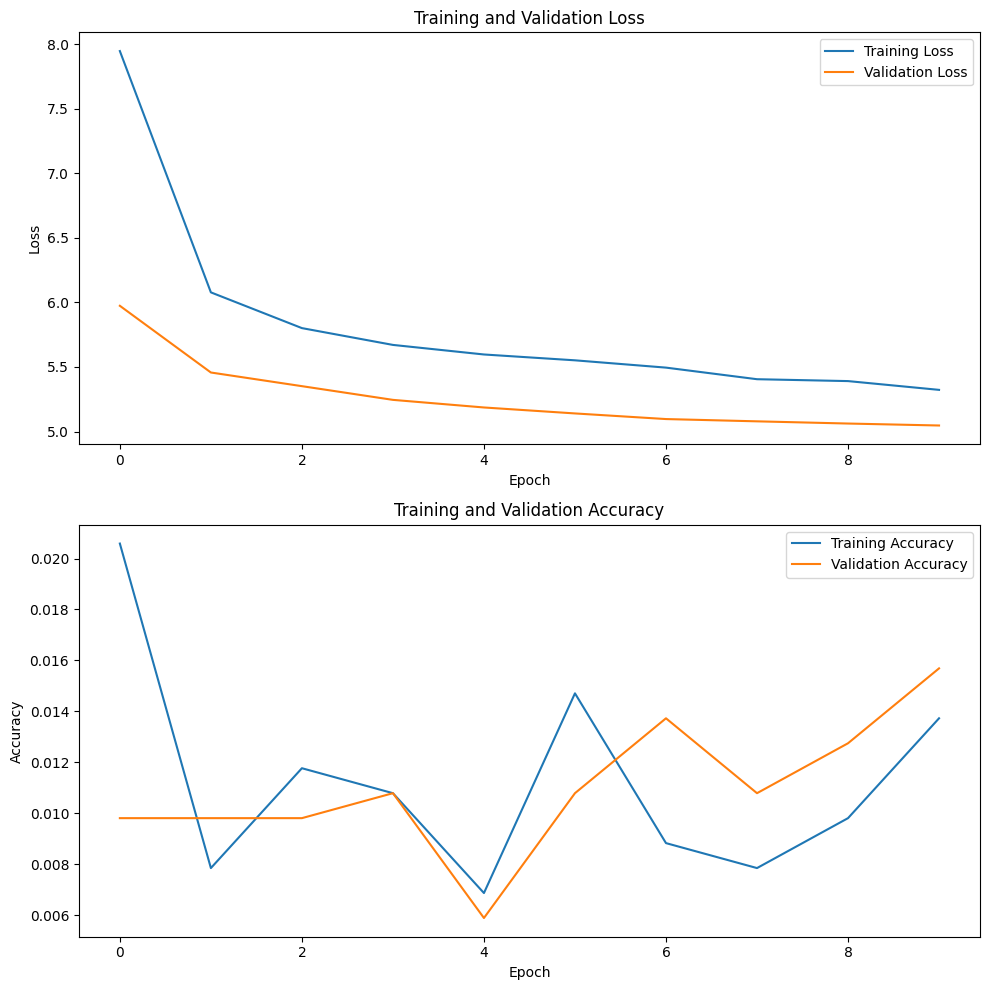

In [ ]:
# plot the loss and accuracy between training and Validation data, top 5 and top 10
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Training and Validation Accuracy')

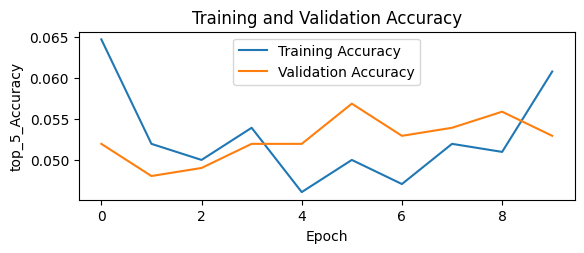

In [ ]:
# Visualization of top 5 and top 10 accuracy
plt.subplot(2, 1, 2)
plt.plot(history.history['top_5_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_top_5_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('top_5_Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Step 8. Evaluateing the Model Performance

In [ ]:
# Evaluate the model performance
test_loss, test_accuracy, test_top_5_accuracy, test_top_10_accuracy = model.evaluate(test_batches)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

NameError: name 'model' is not defined

# Step 9: Improvement
(1)Apply the hierarchical classification to increase learning.

(2)

In [ ]:
# Import packages
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Try to change the dataset name
training_set=dataset['test']
test_set=dataset['train']
validation_set=dataset['validation']

In [ ]:
# check the data length
print(len(training_set))
print(len(validation_set))
print(len(test_set))

6149
1020
1020



print(len(training_set))
print(len(validation_set))
print(len(test_set))

In [ ]:
label_names=dataset_info.features['label'].names

In [ ]:
# setting a desired image size
image_size=224

# creating the function that does not preprocessing
def format_image(image, label):
    image=tf.image.resize(image, (image_size, image_size))/255.0
    # Get the coarse label based on the fine label
    return image, label


# getting the number of example in each set from the dataset info
num_training_examples=0
num_validation_examples=0
num_test_examples=0

for  example in training_set:
    num_training_examples+=1
for example in validation_set:
    num_validation_examples+=1
for example in test_set:
    num_test_examples+=1

# setting up a batch size
Batch_size=32

# Preprocessing images for all 3 subsets
train_batches=training_set.cache().shuffle(num_training_examples//4)
train_batches=train_batches.map(format_image).batch(Batch_size).prefetch(1)

val_batches=validation_set.cache()
val_batches=val_batches.map(format_image).batch(Batch_size).prefetch(1)

test_batches=test_set.cache()
test_batches=test_batches.map(format_image).batch(Batch_size).prefetch(1)

In [ ]:
# Show the picture of them
# Check the numbers of photos per class
train_labels = []
for image, label in train_batches.unbatch():
    train_labels.append(label.numpy())

train_labels_series = pd.Series(train_labels)
print("Number of photos per class in the training set:")
display(train_labels_series.value_counts())

Number of photos per class in the training set:


50    238
76    231
45    176
72    174
88    164
     ... 
20     20
0      20
44     20
6      20
26     20
Name: count, Length: 102, dtype: int64

# Hierarchy classification
### map 102 fine classes to 10 coarse super-classes
(1)use embedding to reduce the dimention of photo and classify based on similar features

(2)use NesNet50 as the preprocessing

(3)Plot the picture  

Summary: This is only roughly to clusterify
conclusion: some super class looks very similar, like group 2, dandelion and sunflower, but some looks very different, group 5 purple coneflower and grape hyacinth

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from collections import defaultdict
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.cluster import AgglomerativeClustering
import os

In [ ]:
# create the ResNet50 Embedding model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3),pooling='avg')
base_model.trainable = False

In [ ]:
# Get the embedding
class_sums = tf.zeros([102, 2048], dtype=tf.float32)
class_counts = tf.zeros([102], dtype=tf.int32)

for imgs, lbls in train_batches:
    feats = base_model(imgs, training=False)  # shape: (batch_size, 2048)

    # add the features of each class
    batch_sums = tf.math.unsorted_segment_sum(feats, lbls, num_segments=102)
    batch_counts = tf.math.unsorted_segment_sum(tf.ones_like(lbls, dtype=tf.int32), lbls, num_segments=102)

    class_sums += batch_sums
    class_counts += batch_counts

class_embeddings = class_sums / tf.cast(tf.expand_dims(class_counts, axis=-1), tf.float32)
print(class_embeddings.shape)  # (102, 2048)




KeyboardInterrupt: 

In [ ]:
# Save the class_embeddings
from google.colab import drive
drive.mount('/content/drive')
np.save('/content/drive/MyDrive/Automating Flower Classification/class_embeddings.npy', class_embeddings.numpy())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


NameError: name 'class_embeddings' is not defined

In [ ]:
# Load class_emnedding.numpy()
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
class_embeddings=np.load('/content/drive/MyDrive/Automating Flower Classification/class_embeddings.npy')

Mounted at /content/drive


In [ ]:
print(class_embeddings.shape)

(102, 2048)


In [ ]:
# Get 10 coarse of super class by Hierarchical clustering
k=10
agglo=AgglomerativeClustering(n_clusters=k, linkage='ward') # Removed affinity='euclidean'
cluster_ids=agglo.fit_predict(class_embeddings) # Used class_embeddings and converted to NumPy

# Output the cluster
for i, cluster in enumerate(cluster_ids):
    print(f"Class {i} → Group {cluster}")

Class 0 → Group 2
Class 1 → Group 2
Class 2 → Group 4
Class 3 → Group 9
Class 4 → Group 7
Class 5 → Group 5
Class 6 → Group 4
Class 7 → Group 9
Class 8 → Group 0
Class 9 → Group 1
Class 10 → Group 4
Class 11 → Group 2
Class 12 → Group 8
Class 13 → Group 2
Class 14 → Group 6
Class 15 → Group 7
Class 16 → Group 5
Class 17 → Group 4
Class 18 → Group 4
Class 19 → Group 6
Class 20 → Group 8
Class 21 → Group 5
Class 22 → Group 6
Class 23 → Group 9
Class 24 → Group 5
Class 25 → Group 7
Class 26 → Group 4
Class 27 → Group 0
Class 28 → Group 1
Class 29 → Group 0
Class 30 → Group 6
Class 31 → Group 0
Class 32 → Group 1
Class 33 → Group 2
Class 34 → Group 5
Class 35 → Group 3
Class 36 → Group 5
Class 37 → Group 5
Class 38 → Group 4
Class 39 → Group 4
Class 40 → Group 2
Class 41 → Group 2
Class 42 → Group 6
Class 43 → Group 9
Class 44 → Group 4
Class 45 → Group 2
Class 46 → Group 2
Class 47 → Group 7
Class 48 → Group 3
Class 49 → Group 2
Class 50 → Group 6
Class 51 → Group 6
Class 52 → Group 6
Cla

In [ ]:
# Redefine the image to coarse label and fine label
image_size=224
def format_image(image, label):
    image=tf.image.resize(image, (image_size, image_size))/255.0
    # define coarse label from fine label
    coarse_label=tf.gather(tf.constant(cluster_ids,dtype=tf.int64), label)
    return image,{"coarse":coarse_label,"fine":label}
# getting the number of example in each set from the dataset info
num_training_examples=0
num_validation_examples=0
num_test_examples=0

for  example in training_set:
    num_training_examples+=1
for example in validation_set:
    num_validation_examples+=1
for example in test_set:
        num_test_examples+=1

# setting up a batch size
Batch_size=32

# Preprocessing images for all 3 subsets
train_batches=training_set.cache().shuffle(num_training_examples//4)
train_batches=train_batches.map(format_image).batch(Batch_size).prefetch(1)

val_batches=validation_set.cache()
val_batches=val_batches.map(format_image).batch(Batch_size).prefetch(1)

test_batches=test_set.cache()
test_batches=test_batches.map(format_image).batch(Batch_size).prefetch(1)


In [ ]:
# Save the train, validation and test batches
def save_dataset_in_batches(dataset, save_dir, prefix, batch_size=500):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    images, coarse_labels, fine_labels = [], [], []
    batch_idx = 0

    for img, lbl in dataset.unbatch():
        # Use the existing format_image function instead of preprocess_image
        img, lbl_dict = format_image(img, lbl['fine']) # Pass the fine label to format_image
        images.append(img.numpy())
        coarse_labels.append(lbl_dict['coarse'].numpy())
        fine_labels.append(lbl_dict['fine'].numpy())


        if len(images) >= batch_size:
            filename = os.path.join(save_dir, f"{prefix}_batch{batch_idx}.npz")
            np.savez(filename,
                     images=np.array(images, dtype=np.float32),
                     coarse=np.array(coarse_labels, dtype=np.int32),
                     fine=np.array(fine_labels, dtype=np.int32))
            print(f"Saved {filename} ({len(images)} samples)")
            images, coarse_labels, fine_labels = [], [], []
            batch_idx += 1

    # 存剩下的
    if len(images) > 0:
        filename = os.path.join(save_dir, f"{prefix}_batch{batch_idx}.npz")
        np.savez(filename,
                 images=np.array(images, dtype=np.float32),
                 coarse=np.array(coarse_labels, dtype=np.int32),
                 fine=np.array(fine_labels, dtype=np.int32))
        print(f"Saved {filename} ({len(images)} samples)")

# 儲存到 Google Drive
save_dataset_in_batches(train_batches, "/content/drive/MyDrive/Automating Flower Classification", "train")
save_dataset_in_batches(val_batches,   "/content/drive/MyDrive/Automating Flower Classification", "val")
save_dataset_in_batches(test_batches,  "/content/drive/MyDrive/Automating Flower Classification", "test")

Saved /content/drive/MyDrive/Automating Flower Classification/train_batch0.npz (500 samples)
Saved /content/drive/MyDrive/Automating Flower Classification/train_batch1.npz (500 samples)
Saved /content/drive/MyDrive/Automating Flower Classification/train_batch2.npz (500 samples)
Saved /content/drive/MyDrive/Automating Flower Classification/train_batch3.npz (500 samples)
Saved /content/drive/MyDrive/Automating Flower Classification/train_batch4.npz (500 samples)
Saved /content/drive/MyDrive/Automating Flower Classification/train_batch5.npz (500 samples)
Saved /content/drive/MyDrive/Automating Flower Classification/train_batch6.npz (500 samples)
Saved /content/drive/MyDrive/Automating Flower Classification/train_batch7.npz (500 samples)
Saved /content/drive/MyDrive/Automating Flower Classification/train_batch8.npz (500 samples)
Saved /content/drive/MyDrive/Automating Flower Classification/train_batch9.npz (500 samples)
Saved /content/drive/MyDrive/Automating Flower Classification/train_ba

In [ ]:
# Load the train, val, and test
def load_npz_pipeline(npz_dir, prefix, batch_size=32, shuffle=False):
    import glob
    files = sorted(glob.glob(os.path.join(npz_dir, f"{prefix}_batch*.npz")))
    datasets = []

    for f in files:
        data = np.load(f)
        ds = tf.data.Dataset.from_tensor_slices(
            (data['images'], {'coarse': data['coarse'], 'fine': data['fine']})
        )
        datasets.append(ds)

    full_ds = datasets[0]
    for ds in datasets[1:]:
        full_ds = full_ds.concatenate(ds)

    if shuffle:
        full_ds = full_ds.shuffle(1000)

    full_ds = full_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return full_ds

# 範例：建立 pipeline
train_batches = load_npz_pipeline("/content/drive/MyDrive/Automating Flower Classification", "train", batch_size=32, shuffle=True)
val_batches   = load_npz_pipeline("/content/drive/MyDrive/Automating Flower Classification", "val", batch_size=32)
test_batches  = load_npz_pipeline("/content/drive/MyDrive/Automating Flower Classification", "test", batch_size=32)

In [ ]:
# Plot the Hierachical clustering of each name of class, not image
# import packages
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram




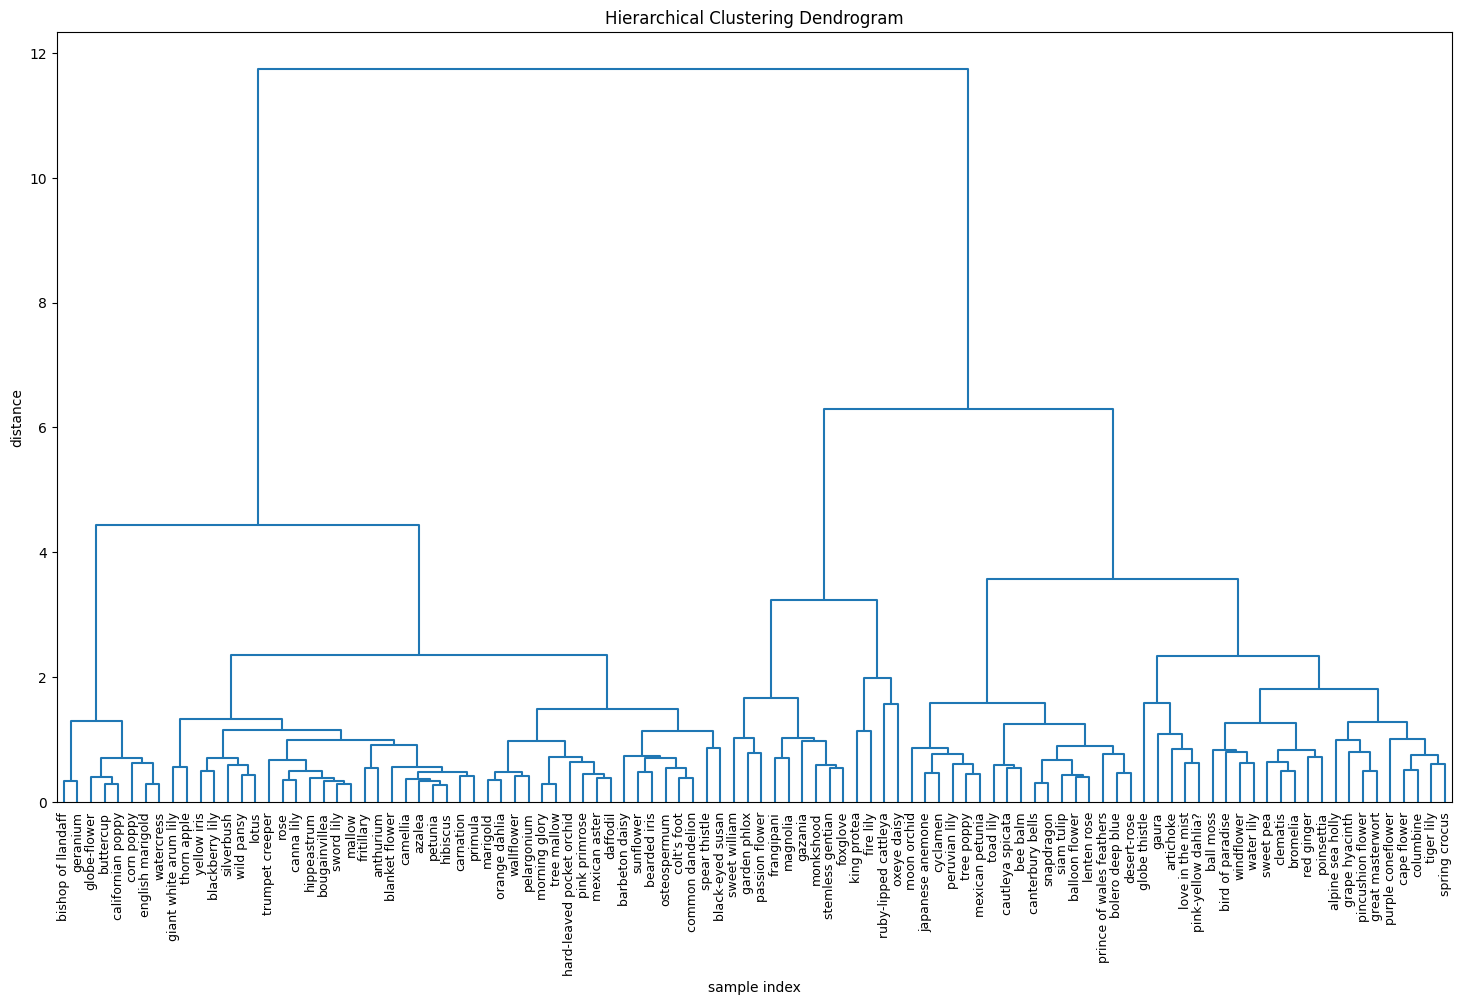

In [ ]:
embedding_np=class_embeddings
names=label_names
linked=linkage(embedding_np, method='ward')
plt.figure(figsize=(18,10))
dendrogram(linked,labels=names, leaf_rotation=90,leaf_font_size=9,color_threshold=0)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

In [ ]:
# Plot the Group 1
target_group = 5

# Find all class belong to this index
group_indices = [i for i, cluster in enumerate(cluster_ids) if cluster == target_group]

#Change the class index to flowers' name
group_class_names = [label_names[i] for i in group_indices]

# Display the result
print(f"Classes in Group {target_group}:")
for name in group_class_names:
    print(name)

# Show the Image of Group 1, limiting to a maximum of 36 images
plt.figure(figsize=(10, 10))
images_to_plot = []
for class_name in group_class_names:
    for image, label in train_batches.unbatch():
        if label_names[label.numpy()] == class_name:
            images_to_plot.append((image.numpy(), class_name))
            if len(images_to_plot) >= 36:
                break
    if len(images_to_plot) >= 36:
        break

for i, (image, class_name) in enumerate(images_to_plot):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()




Classes in Group 5:
tiger lily
purple coneflower
pincushion flower
grape hyacinth
alpine sea holly
cape flower
great masterwort
spring crocus
columbine


In [ ]:
# Plot the flowers name in group 1
def group_classes(target_group, cluster_ids, label_names, train_batches, max_classes=20):
    image_group_indices = [i for i, cluster in enumerate(cluster_ids) if cluster == target_group]
    group_class_names = [label_names[i] for i in image_group_indices]
    print(f"Classes in Group {target_group}:")

    for name in group_class_names:
        print(name)

    plt.figure(figsize=(12, 12))
    shown_classes = set()
    plot_index = 1


# find the plot of the class and save only one plot
    for image, label in train_batches.unbatch():
        class_id=label.numpy()
        class_name=label_names[class_id]
        if class_id in group_indices and class_name not in shown_classes:
            ax=plt.subplot(5, 5, plot_index)
            plt.imshow(image.numpy())
            plt.title(class_name, fontsize=8) # Corrected typo here
            plt.axis("off")
            shown_classes.add(class_name) # Changed append to add for set
            plot_index+=1
            if plot_index>25:
                break
    plt.tight_layout()
    plt.show()

In [ ]:
group_classes(target_group=1, cluster_ids=cluster_ids, label_names=label_names, train_batches=train_batches)

NameError: name 'label_names' is not defined

Classes in Group 2:
pink primrose
hard-leaved pocket orchid
colt's foot
spear thistle
mexican aster
barbeton daisy
daffodil
wallflower
marigold
common dandelion
sunflower
pelargonium
orange dahlia
black-eyed susan
osteospermum
bearded iris
morning glory
tree mallow


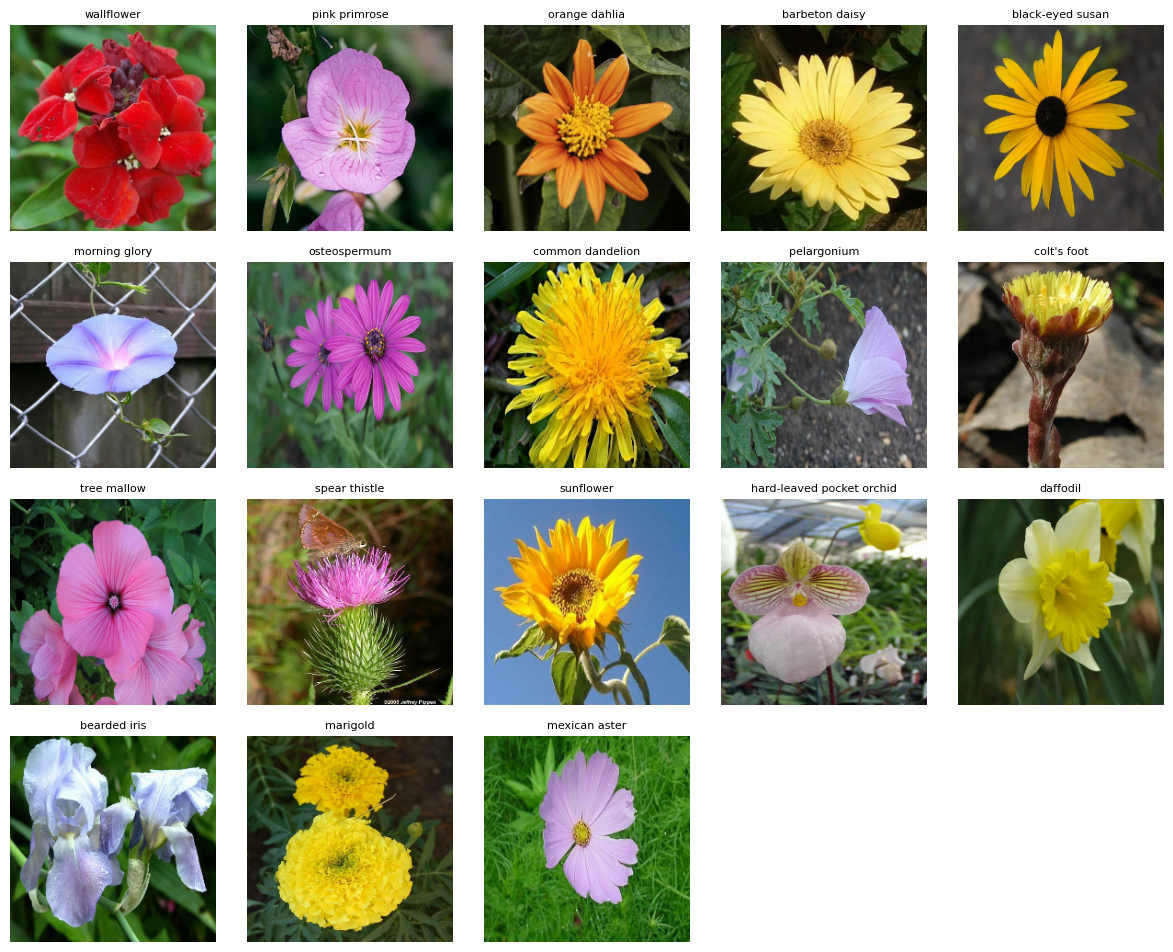

In [ ]:
group_classes(target_group=2, cluster_ids=cluster_ids, label_names=label_names, train_batches=train_batches)

Classes in Group 3:
ruby-lipped cattleya
oxeye daisy


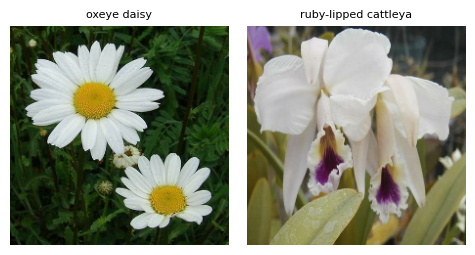

In [ ]:
group_classes(target_group=3, cluster_ids=cluster_ids, label_names=label_names, train_batches=train_batches)

Classes in Group 4:
canterbury bells
moon orchid
snapdragon
peruvian lily
balloon flower
prince of wales feathers
siam tulip
lenten rose
bolero deep blue
cautleya spicata
japanese anemone
tree poppy
toad lily
desert-rose
cyclamen
bee balm
mexican petunia


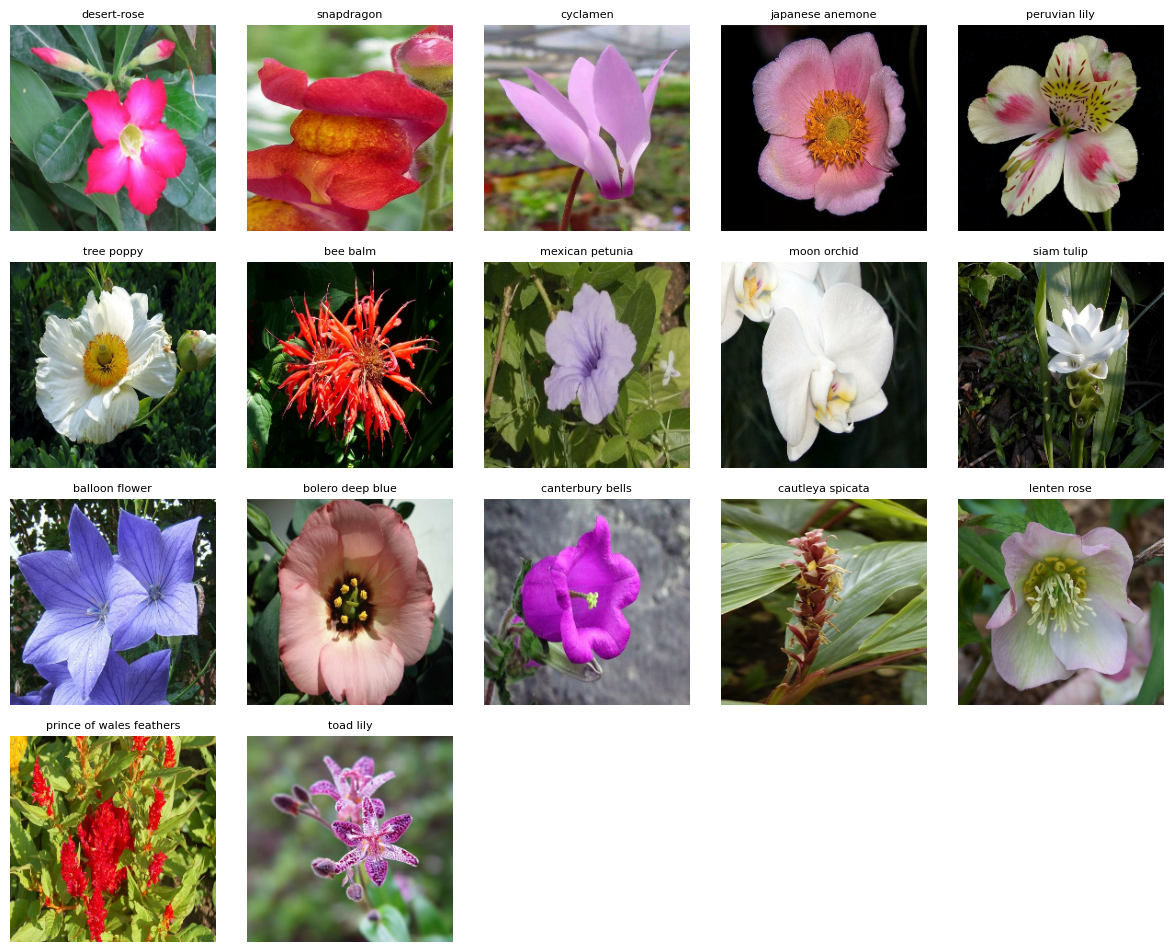

In [ ]:
group_classes(target_group=4, cluster_ids=cluster_ids, label_names=label_names, train_batches=train_batches)

Classes in Group 5:
tiger lily
purple coneflower
pincushion flower
grape hyacinth
alpine sea holly
cape flower
great masterwort
spring crocus
columbine


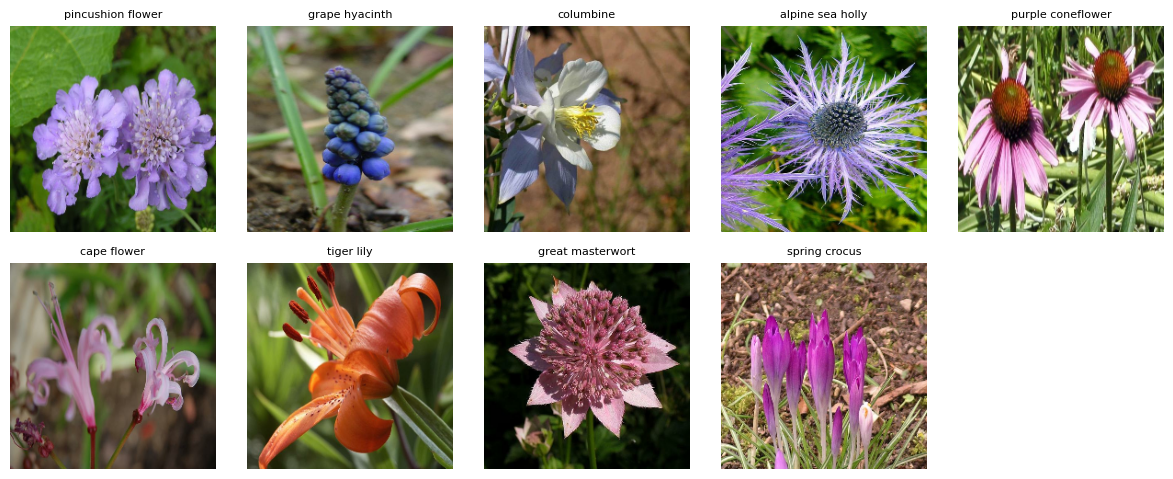

In [ ]:
group_classes(target_group=5, cluster_ids=cluster_ids, label_names=label_names, train_batches=train_batches)

## Build the Model( Hierarchical Multi-task Model)
The model is with two heads, one is for 102 class(fine label) and the othere is for cluster 10 (coarse label)

In [ ]:
# Input essential packages
from tensorflow.keras import layers, Model
from tensorflow.keras.models import load_model

In [ ]:
# Load the pretrained NesNet 50 model, excluding the top layers
num_classes=102
image_shape=(224, 224, 3)


base_model=ResNet50(include_top=False, weights='imagenet',
                    input_shape=image_shape, pooling='avg',
                    name='resnet50')
# Freeze the base_model
for layer in base_model.layers:
    base_model.trainable=False
for layer in base_model.layers[-30:]:
    layer.trainable=True

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# Create a two Dense ouptut coarse and fine
inputs=layers.Input(shape=image_shape)
x=base_model(inputs,training=False)

# coarse head (10 clusters)
coarse_branch=layers.Dense(256, activation='relu')(x)
coarse_branch=layers.Dropout(0.5)(coarse_branch)
coarse_output=layers.Dense(10, activation='softmax', name='coarse')(coarse_branch)

# fine head(102 classes)
fine_branch=layers.Dense(512, activation='relu')(x)
fine_branch=layers.Dropout(0.5)(fine_branch)
fine_output=layers.Dense(num_classes, activation='softmax',name='fine')(fine_branch)

# Build Model
model=Model(inputs, outputs=[coarse_output, fine_output])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 2048)      │ 23,587,712 │ input_layer_2[0]… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │    524,544 │ resnet50[1][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 512)       │  1,049,088 │ resnet50[1][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 256)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 512)       │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ coarse (Dense)      │ (None, 10)        │      2,570 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fine (Dense)        │ (None, 102)       │     52,326 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 25,216,240 (96.19 MB)

 Trainable params: 16,078,704 (61.34 MB)

 Non-trainable params: 9,137,536 (34.86 MB)

In [ ]:
# Compile with multi-task loss

losses={"coarse":tf.keras.losses.SparseCategoricalCrossentropy(),"fine":tf.keras.losses.SparseCategoricalCrossentropy()}

loss_weights={"coarse":0.2,"fine":0.8}
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss=losses, loss_weights=loss_weights, metrics={"coarse":"accuracy","fine": "accuracy"})

In [ ]:
import os
import tensorflow as tfflow
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.metrics import SparseTopKCategoricalAccuracy

In [ ]:
# set the early stopping
early_stopping = EarlyStopping(monitor='val_fine_loss', patience=3, restore_best_weights=True, mode='min')

In [ ]:
# set the 10 epoches
epoches=10
history=model.fit(train_batches, epochs=epoches, validation_data=val_batches, callbacks=[early_stopping])

Epoch 1/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 75s 205ms/step - coarse_accuracy: 0.3140 - coarse_loss: 1.9786 - fine_accuracy: 0.0678 - fine_loss: 4.3393 - loss: 3.8672 - val_coarse_accuracy: 0.2510 - val_coarse_loss: 2.6418 - val_fine_accuracy: 0.0157 - val_fine_loss: 6.3996 - val_loss: 5.6488
Epoch 2/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 25s 129ms/step - coarse_accuracy: 0.3945 - coarse_loss: 1.6905 - fine_accuracy: 0.1101 - fine_loss: 3.8285 - loss: 3.4009 - val_coarse_accuracy: 0.2804 - val_coarse_loss: 1.9969 - val_fine_accuracy: 0.0255 - val_fine_loss: 4.7528 - val_loss: 4.2024
Epoch 3/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 41s 132ms/step - coarse_accuracy: 0.4096 - coarse_loss: 1.6390 - fine_accuracy: 0.1323 - fine_loss: 3.6778 - loss: 3.2701 - val_coarse_accuracy: 0.3147 - val_coarse_loss: 1.7636 - val_fine_accuracy: 0.0549 - val_fine_loss: 4.1055 - val_loss: 3.6374
Epoch 4/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 41s 134ms/step - coarse_accuracy: 0.4422 - coarse_loss: 1.5583 - fine_accuracy: 0.1720 - fine

In [ ]:
# Save this model
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/Automating Flower Classification/hierachical_model.h5')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the model
from google.colab import drive
drive.mount('/content/drive')
model=load_model('/content/drive/MyDrive/Automating Flower Classification/hierachical_model.h5')

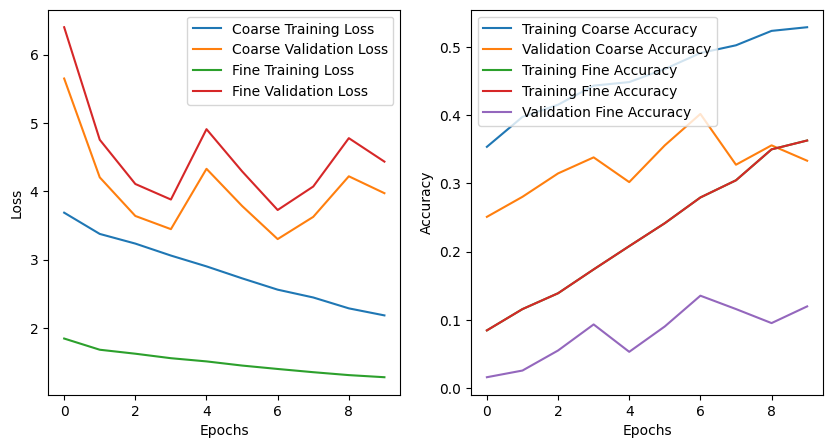

In [ ]:
# Plot the loss and accurcy of training and validation dataset for coarse and fine
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Coarse Training Loss')
plt.plot(history.history['val_loss'], label='Coarse Validation Loss')
plt.plot(history.history['coarse_loss'], label='Fine Training Loss')
plt.plot(history.history['val_fine_loss'], label='Fine Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['coarse_accuracy'], label='Training Coarse Accuracy')
plt.plot(history.history['val_coarse_accuracy'], label='Validation Coarse Accuracy')
plt.plot(history.history['fine_accuracy'],label='Training Fine Accuracy')

plt.plot(history.history['fine_accuracy'], label='Training Fine Accuracy')
plt.plot(history.history['val_fine_accuracy'], label='Validation Fine Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# set the 10 epoches, monitor is val_accuracy, learning rate is 0.01
epoches=10
history=model.fit(train_batches, epochs=epoches, validation_data=val_batches, callbacks=[early_stopping])

Epoch 1/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 27s 139ms/step - coarse_accuracy: 0.3511 - coarse_loss: 1.7621 - fine_accuracy: 0.0875 - fine_loss: 4.0092 - loss: 3.5598 - val_coarse_accuracy: 0.2539 - val_coarse_loss: 2.6712 - val_fine_accuracy: 0.0225 - val_fine_loss: 6.8078 - val_loss: 5.9817
Epoch 2/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 41s 139ms/step - coarse_accuracy: 0.3823 - coarse_loss: 1.6962 - fine_accuracy: 0.1128 - fine_loss: 3.8561 - loss: 3.4241 - val_coarse_accuracy: 0.2265 - val_coarse_loss: 7.7612 - val_fine_accuracy: 0.0098 - val_fine_loss: 25.8697 - val_loss: 22.2517
Epoch 3/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 26s 137ms/step - coarse_accuracy: 0.3895 - coarse_loss: 1.6654 - fine_accuracy: 0.1248 - fine_loss: 3.7627 - loss: 3.3432 - val_coarse_accuracy: 0.2500 - val_coarse_loss: 4.6831 - val_fine_accuracy: 0.0167 - val_fine_loss: 19.5131 - val_loss: 16.5478
Epoch 4/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 41s 136ms/step - coarse_accuracy: 0.4067 - coarse_loss: 1.6247 - fine_accuracy: 0.1378 - 

# Results: Compare to the original model(with the hierieracl clustering)
for training part;
coarse accuracy: 0.5258
fine accuracy:0.3506

for validation part
coarse accuracy:0.3333
fine accuracy:0.1196

original mode
for training part:

fine accuracy:0.0085

for validation part:
fine accuracy:0.0098
increase about 10 fold